In [1]:
# !git clone https://github.com/pengzhiliang/MAE-pytorch
# !wget https://image-net.org/data/tiny-imagenet-200.zip
# !rm myfuc/trains.p
# !rm tinydata/*.png
# !pip install --user --process-dependency-links -e 

In [2]:
from torchvision import transforms
from PIL import Image
import os,glob
import re
from myfuc import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

!pwd
dataLoader=readWTData()
datasetMaker=makeDataset()
print(torch.cuda.is_available())

ModuleNotFoundError: No module named 'torch'

In [27]:
w, h=7,4
normType=2

  Building high rmse: 10.016296376271193
  Building high rmse: 12.246581970189697
  Building high rmse: 30.587320174857833
  Building high rmse: 35.87003678707103
  Building high rmse: 71.52297377433294
  Building high rmse: 84.80243317024649
  Building high rmse: 173.50053301786016
  Building high rmse: 241.3964537812486
  Building high rmse: 382.2173989422231
  Building high rmse: 753.0745614538951
     WOMAN high rmse: 12.01311121995045
     WOMAN high rmse: 7.042006014586463
     WOMAN high rmse: 27.84526838666734
     WOMAN high rmse: 19.7005109334191
     WOMAN high rmse: 65.86229244019574
     WOMAN high rmse: 51.03208508654746
     WOMAN high rmse: 167.54876823562952
     WOMAN high rmse: 140.7934016724491
     WOMAN high rmse: 339.8856451943199
     WOMAN high rmse: 265.81332513576695
    BRIDGE high rmse: 18.692800040136227
    BRIDGE high rmse: 21.89698252313198
    BRIDGE high rmse: 34.31023852346127
    BRIDGE high rmse: 44.56626892441444
    BRIDGE high rmse: 67.020606105

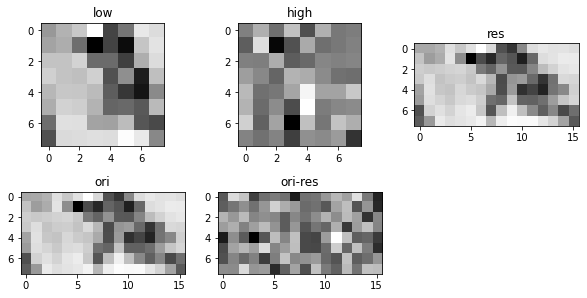

In [28]:
# Training set
dataLoader=readWTData()
datasetMaker=makeDataset()
in_list=glob.glob("ppwOut_New_5_Q/train/*/")
in_ori="ppwOut_New_5_NOQ"
for path0 in in_list[:]:
    for lv in range(5):
        imgName=re.findall("\w+/",path0)[-1][:-1]
        
        pathLow=path0+"ewpLH-LCoefR_%d.dig"%lv
        pathHigh=path0+"ewpLH-HCoef_%d.dig"%lv
        pathRes=path0+"ewpLH-ImageR_%d.dig"%lv
        pathOri=in_ori+path0[path0.find("/"):]+"ewpLH-ImageR_%d.dig"%lv
        low,high,res,ori=dataLoader.makeImg(pathLow,pathHigh,pathRes,pathOri) # target is high
        print("%10s high rmse:"%imgName,rmse(high,0))
        norm=datasetMaker.myN2(low,high,ori,res,width=w, height=h-1,normType=normType)
    
        pathLow=path0+"ewpHL-LCoefR_%d.dig"%lv
        pathHigh=path0+"ewpHL-HCoef_%d.dig"%lv
        pathRes=path0+"ewpHL-ImageR_%d.dig"%lv
        pathOri=in_ori+path0[path0.find("/"):]+"ewpHL-ImageR_%d.dig"%lv
        low,high,res,ori=dataLoader.makeImg(pathLow,pathHigh,pathRes,pathOri) # target is high
        print("%10s high rmse:"%imgName,rmse(high,0))
        norm=datasetMaker.myN2(low,high,ori,res,width=w, height=h-1,normType=normType)
        
        # pathLow=path0+"ewpHH-LCoefR_%d.dig"%lv
        # pathHigh=path0+"ewpHH-HCoef_%d.dig"%lv
        # pathRes=path0+"ewpHH-ImageR_%d.dig"%lv
        # pathOri=in_ori+path0[path0.find("/"):]+"ewpHH-ImageR_%d.dig"%lv
        # low,high,res,ori=dataLoader.makeImg(pathLow,pathHigh,pathRes,pathOri) # target is high
        # print("%10s rmse:"%imgName,rmse(ori,res))
        # datasetMaker.myN2(low,high,ori,res,width=w, height=h-1)
    
trainData=datasetMaker.out()
datasetMaker.plot(low,high,ori,res,5)

   BARBARA high rmse: 27.01765747488869
   BARBARA high rmse: 5.795756123443185
   BARBARA high rmse: 45.434840895921205
   BARBARA high rmse: 19.293615488109722
   BARBARA high rmse: 55.212570626345524
   BARBARA high rmse: 46.93373746299128
   BARBARA high rmse: 158.8835315097545
   BARBARA high rmse: 124.01351067727752
   BARBARA high rmse: 426.20127271926594
   BARBARA high rmse: 307.59421645940887
Data amount = 40762
ori.shape = (8, 16)


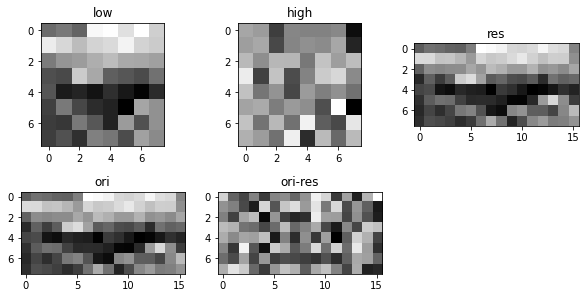

In [29]:
# Vali set
dataLoader=readWTData()
datasetMaker=makeDataset()
in_list=glob.glob("ppwOut_New_5_Q/val/*/")
in_list=['ppwOut_New_5_Q/val/BOAT/', 'ppwOut_New_5_Q/val/LENNA/', 'ppwOut_New_5_Q/val/BARBARA/']
in_ori="ppwOut_New_5_NOQ"
imgind=2
# for path0 in in_list:
for path0 in in_list[imgind:imgind+1]:
    for lv in range(5):
        imgName=re.findall("\w+/",path0)[-1][:-1]

        pathLow=path0+"ewpLH-LCoefR_%d.dig"%lv
        pathHigh=path0+"ewpLH-HCoef_%d.dig"%lv
        pathRes=path0+"ewpLH-ImageR_%d.dig"%lv
        pathOri=in_ori+path0[path0.find("/"):]+"ewpLH-ImageR_%d.dig"%lv
        low,high,res,ori=dataLoader.makeImg(pathLow,pathHigh,pathRes,pathOri) # target is high
        print("%10s high rmse:"%imgName,rmse(high,np.average(high)))
        norm=datasetMaker.myN2(low,high,ori,res,width=w, height=h-1,normType=normType)
        
        pathLow=path0+"ewpHL-LCoefR_%d.dig"%lv
        pathHigh=path0+"ewpHL-HCoef_%d.dig"%lv
        pathRes=path0+"ewpHL-ImageR_%d.dig"%lv
        pathOri=in_ori+path0[path0.find("/"):]+"ewpHL-ImageR_%d.dig"%lv
        low,high,res,ori=dataLoader.makeImg(pathLow,pathHigh,pathRes,pathOri) # target is high
        print("%10s high rmse:"%imgName,rmse(high,0))
        norm=datasetMaker.myN2(low,high,ori,res,width=w, height=h-1,normType=normType)

        # pathLow=path0+"ewpHH-LCoefR_%d.dig"%lv
        # pathHigh=path0+"ewpHH-HCoef_%d.dig"%lv
        # pathRes=path0+"ewpHH-ImageR_%d.dig"%lv
        # pathOri=in_ori+path0[path0.find("/"):]+"ewpHH-ImageR_%d.dig"%lv
        # low,high,res,ori=dataLoader.makeImg(pathLow,pathHigh,pathRes,pathOri) # target is high
        # print("%10s rmse:"%imgName,rmse(ori,res))
        # datasetMaker.myN2(low,high,ori,res,width=w, height=h-1)
    
valData=datasetMaker.out()
datasetMaker.plot(low,high,ori,res,5)

In [30]:
# train_size=len(inputTrain)//6*5
# trainData,valData=torch.utils.data.random_split(inputTrain, [train_size, len(inputTrain)-train_size])

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.backends.cudnn.benchmark = True

# criterion=MAELoss()
criterion=RMSELoss()
# criterion=ATANLoss()
# criterion=QLoss()
criterion.to(device)
print(len(trainData),len(valData))

366858 40762


In [32]:
print("input_size: %d"%(w*h))
model=Net_CNN(w*h,4.5)
# model=Net_CNN(w*h,3)
# model=Net_CNN_simp(w*h,4.5)

n_epochs = 100
log_interval,random_seed = 10,1
learning_rate=0.0002
betas0=(0.5,0.999)
batch_size = 16


torch.manual_seed(random_seed)
train_loader= DataLoader(trainData,batch_size=batch_size,shuffle=1)
vali_loader = DataLoader(valData,batch_size=batch_size,shuffle=1)
# model = nn.DataParallel(model, device_ids=[0]).to(device)
model = nn.DataParallel(model).to(device)
optimizer = optim.Adam(model.parameters(),lr=learning_rate,betas=betas0)
print(model)

trainer=trainS()
best=float("inf")
# modelPath="my_74_2H_dp45_norm2_lr2_net2/"
modelPath="my_74_2H_dp45_norm2_lr2_net1/"
os.makedirs(modelPath, exist_ok=True)
losses=[]
for i in range(n_epochs):
    valLoss,trainLoss,qLoss=trainer.trainS1(model,i,train_loader,vali_loader,criterion,optimizer)
    checkpoint = {
        'state_dict': model.module.state_dict(),
        'opt_state_dict': optimizer.state_dict(),
        'epoch': i
    }
    losses.append(valLoss)
    losses.append(trainLoss)
    losses.append(qLoss)

    torch.save(checkpoint, modelPath+"checkpoint%03d.pt"%i)
    if valLoss<best:
        torch.save(checkpoint, modelPath+"best%03d.pt"%i)
        best=valLoss


input_size: 28
DataParallel(
  (module): Net_CNN(
    (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fc1): Linear(in_features=14336, out_features=64, bias=True)
    (fc2): Linear(in_features=64, out_features=1, bias=True)
    (drop): Dropout(p=0.45, inplace=False)
  )
)
Epoch     1 ||  Training   0.025682  ||  Validation   0.036197 ||  Vali_Qloss   0.000000
Epoch     2 ||  Training   0.024325  ||  Validation   0.033659 ||  Vali_Qloss   0.000000
Epoch     3 ||  Training   0.023873  ||  Validation   0.032916 ||  Vali_Qloss   0.000000
Epoch     4 ||  Training   0.023659  ||  Validation   0.032208 ||  Vali_Qloss   0.000000
Epoch     5 ||  Training   0.023446  ||  Validation   0.033559 ||  Vali_Qloss   0.000000
Epoch     6 ||  Training   0.023244  ||  Validation   0.032171 ||  Vali_Qloss   0.000000
Ep

KeyboardInterrupt: 

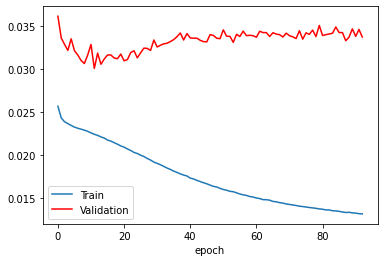

In [33]:
plt.plot(losses[1::3],label="Train")
plt.plot(losses[::3],label="Validation",color="r")
plt.xlabel("epoch")
plt.legend()
plt.savefig(modelPath+"epochs.png")

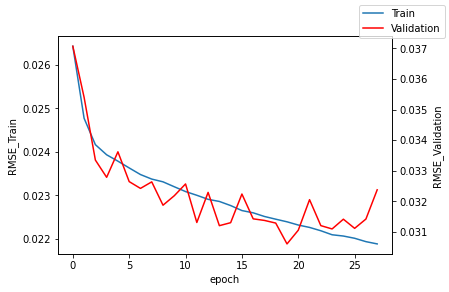

In [14]:
nohup ./ppwCoder > log10.log 2>&1 &
panda 20
cow 10
jaguar 30
rat 50

In [13]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name,param.size())
pp=0
for p in list(model.parameters()):
    nn=1
    for s in list(p.size()):
        nn = nn*s
    pp += nn
print("parameter num = %d"%pp)

module.conv1.weight torch.Size([32, 1, 3, 3])
module.conv1.bias torch.Size([32])
module.conv2.weight torch.Size([128, 32, 3, 3])
module.conv2.bias torch.Size([128])
module.conv3.weight torch.Size([512, 128, 3, 3])
module.conv3.bias torch.Size([512])
module.fc1.weight torch.Size([64, 14336])
module.fc1.bias torch.Size([64])
module.fc2.weight torch.Size([1, 64])
module.fc2.bias torch.Size([1])
parameter num = 1545281
